### Import necessary libraries, packages, and dependencies 
- Use os to access the operating system
- Use pandas to create DataFrames and perform analysis 
- Use datetime to convert dates/timestamps to datetime
- Use dotenv to access .env variables 
- Use sqlalchemy to connect to postgres
- Use hvplot for visuals

In [1]:
import os
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv
from sqlalchemy import create_engine
import hvplot.pandas

### Connect to database and retrieve necessary data
- Connect to the 'arbi_db' database 
- Retrieve all data from the 'luffy' table

In [2]:
# Load environment variables from .env file
load_dotenv()

# Access the variables 
psql_username = os.getenv('PSQL_USERNAME')
psql_password = os.getenv('PSQL_PASSWORD')
psql_host = os.getenv('PSQL_HOST')
psql_port = os.getenv('PSQL_PORT')
db_name = os.getenv('DB_NAME')

# Define the database url
db_url = f"postgresql://{psql_username}:{psql_password}@{psql_host}:{psql_port}/{db_name}" 

# Create the engine object
engine = create_engine(db_url)

# Write ethe SQL query
query = 'SELECT * FROM luffy'

# Read the SQL query into a DataFrame
luffy_df = pd.read_sql(query, engine)

# Show the DataFrame's head
luffy_df.head()


,trade_count,current_datetime,currency,volume,buy_exchange,buy_price,total_purchase_amount,sell_exchange,sell_price,total_sale_amount,profit,spread_percentage,wallet_balance
0,1,2024-02-27T10:29:48.468119,bitcoin,0.006896,Binance,57274.71000,394.959888,Gemini,57301.08000,395.141732,0.181845,0.046041,5642.181845
1,2,2024-02-27T10:29:48.468119,bitcoin,0.006896,Bitstamp,57283.00000,395.017055,Gemini,57301.08000,395.141732,0.124678,0.031563,5642.306522
2,3,2024-02-27T10:29:48.468119,polygon,3169.441883,Binance,1.03190,3270.547079,Poloniex,1.03336,3275.174464,4.627385,0.141487,5646.933907
3,4,2024-02-27T10:29:48.468119,polygon,3169.441883,Bitstamp,1.03231,3271.846550,Poloniex,1.03336,3275.174464,3.327914,0.101714,5650.261821
4,5,2024-02-27T10:29:48.468119,polygon,3169.441883,Gemini,1.03255,3272.607216,Poloniex,1.03336,3275.174464,2.567248,0.078447,5652.829069


### Data Analysis
- Number of trades by exchange 
- View the average 'total_purchase_price', 'profit', 'spread_percentage' by exchange for each coin
- Then view by coin only

##### Number of Traded

In [3]:
# Convert the current_datetime column to only show the date
luffy_df['current_datetime'] = pd.to_datetime(luffy_df['current_datetime'])
luffy_df['current_datetime'] = pd.to_datetime(luffy_df['current_datetime'].dt.date)

# Set the index to the current_datetime column
luffy_df.set_index('current_datetime')



,trade_count,currency,volume,buy_exchange,buy_price,total_purchase_amount,sell_exchange,sell_price,total_sale_amount,profit,spread_percentage,wallet_balance
current_datetime,,,,,,,,,,,,
2024-02-27,1,bitcoin,0.006896,Binance,57274.71000,394.959888,Gemini,57301.08000,395.141732,0.181845,0.046041,5642.181845
2024-02-27,2,bitcoin,0.006896,Bitstamp,57283.00000,395.017055,Gemini,57301.08000,395.141732,0.124678,0.031563,5642.306522
2024-02-27,3,polygon,3169.441883,Binance,1.03190,3270.547079,Poloniex,1.03336,3275.174464,4.627385,0.141487,5646.933907
2024-02-27,4,polygon,3169.441883,Bitstamp,1.03231,3271.846550,Poloniex,1.03336,3275.174464,3.327914,0.101714,5650.261821
2024-02-27,5,polygon,3169.441883,Gemini,1.03255,3272.607216,Poloniex,1.03336,3275.174464,2.567248,0.078447,5652.829069
2024-02-27,6,polygon,3169.441883,Kraken,1.03150,3269.279302,Poloniex,1.03336,3275.174464,5.895162,0.180320,5658.724231
2024-02-27,7,solana,2.061864,Binance,109.39000,225.547340,Bitstamp,109.45000,225.671052,0.123712,0.054850,5658.847943
2024-02-27,8,solana,2.061864,Binance,109.39000,225.547340,Gemini,109.44200,225.654557,0.107217,0.047536,5658.955160
2024-02-27,9,solana,2.061864,Binance,109.39000,225.547340,Kraken,109.40000,225.567958,0.020619,0.009142,5658.975779


##### Averages by Exchange by Coin

In [4]:
# Preview df
luffy_summary = luffy_df.groupby(['currency', 'buy_exchange'])[['total_purchase_amount','profit', 'spread_percentage', 'wallet_balance']].mean()
display(luffy_summary)

total_purchase_amount    profit  spread_percentage  \
currency buy_exchange                                                       
bitcoin  Binance                  394.959888  0.181845           0.046041   
         Bitstamp                 395.017055  0.124678           0.031563   
polygon  Binance                 3270.547079  4.627385           0.141487   
         Bitstamp                3271.846550  3.327914           0.101714   
         Gemini                  3272.607216  2.567248           0.078447   
         Kraken                  3269.279302  5.895162           0.180320   
solana   Binance                  225.547340  0.083849           0.037176   

                       wallet_balance  
currency buy_exchange                  
bitcoin  Binance          5642.181845  
         Bitstamp         5642.306522  
polygon  Binance          5646.933907  
         Bitstamp         5650.261821  
         Gemini           5652.829069  
         Kraken           5658.724231  
solana   Binance          5658.926294

##### Averages by Coin

In [5]:
# Preview df
luffy_summary_coin = luffy_df.groupby(['currency'])[['total_purchase_amount','profit', 'spread_percentage', 'wallet_balance']].mean()
display(luffy_summary_coin)

,total_purchase_amount,profit,spread_percentage,wallet_balance
currency,,,,
bitcoin,394.988471,0.153261,0.038802,5642.244183
polygon,3271.070037,4.104427,0.125492,5652.187257
solana,225.547340,0.083849,0.037176,5658.926294


##### Profits

<Axes: ylabel='profit'>

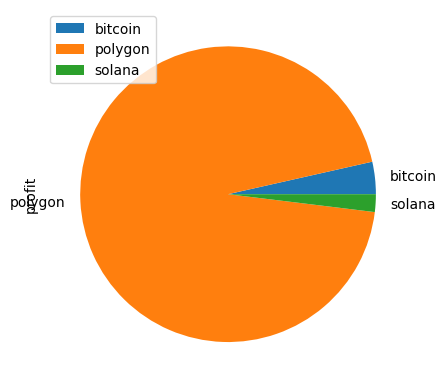

In [6]:
# luffy_summary_grouped.drop(columns=['total_purchase_amount', 'spread_percentage', 'wallet_balance'], inplace=True)
luffy_profits = luffy_summary_coin.plot.pie(y='profit')

luffy_profits

In [7]:
# note- change datetime to only be the time

# returns = scenario_one_df.loc[:,['currency','profit']].set_index(['currency']).pct_change().dropna()
# returns['cummulative_sum'] = returns['profit'].cumsum()
# # returns.hvplot(kind='bar', by='currency').opts(color=['gray', 'red', 'green', 'orange'], hover_color='red', bgcolor='pink')
# returns.hvplot(kind='bar', by='currency', color=['gray', 'red', 'green', 'orange'])

# returns

